<a href="https://colab.research.google.com/github/ShreyaMohanty12/Task1_GRIP-AUGUST-21/blob/main/TSF_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name** : Shreya Mohanty
# **Batch** : August'21

# *Task 2* : Prediction using Unsupervised ML

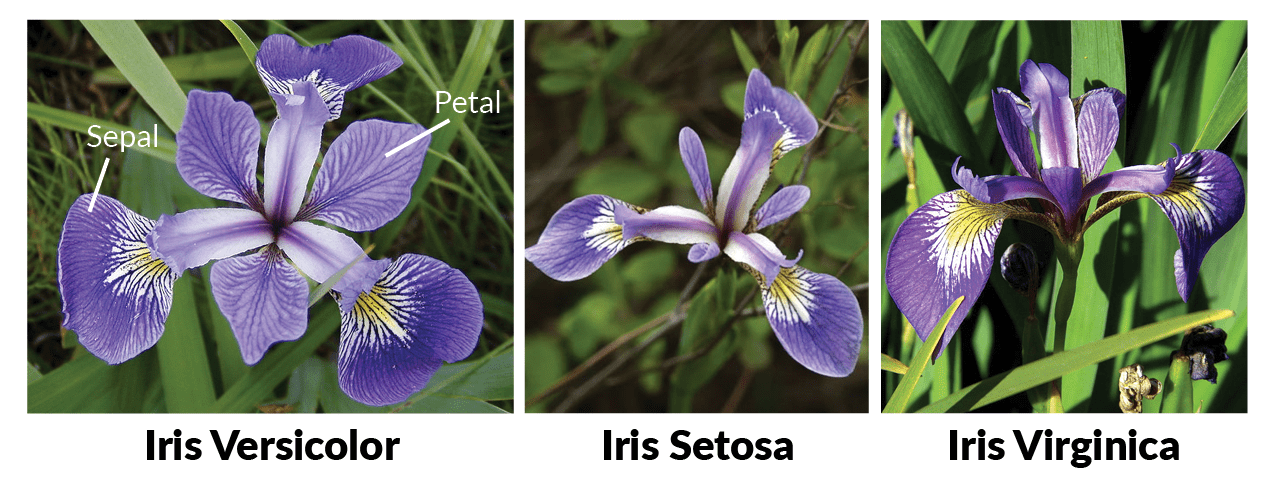

# Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

Dataset Link : [Iris Dataset](https://bit.ly/3kXTdox)

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('darkgrid')

In [2]:
# Loading the dataset

df = pd.read_csv('/content/Iris.csv')

In [3]:
# First five rows of the dataFrame

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Shape of the DataFrame

df.shape

(150, 6)

In [5]:
# Different columns in the DataFrame

df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# Total classes available in the dataset

print(df.Species.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


The 'Id' column is not required for analysis and model training.So, it can be removed from the dataset.

In [7]:
# Removing the 'Id' column

df.drop('Id',axis=1,inplace=True)

In [8]:
# Basic statistics about the numeric columns

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


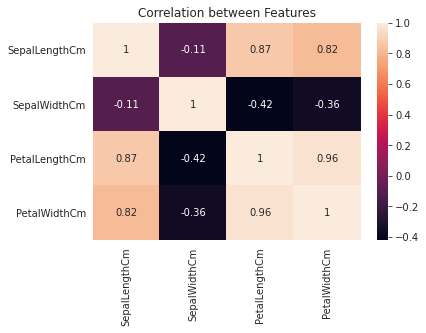

In [10]:
# Finding Correlation between features

corr = df.corr()
plt.title('Correlation between Features')
sns.heatmap(corr,annot=True);

# Visualization

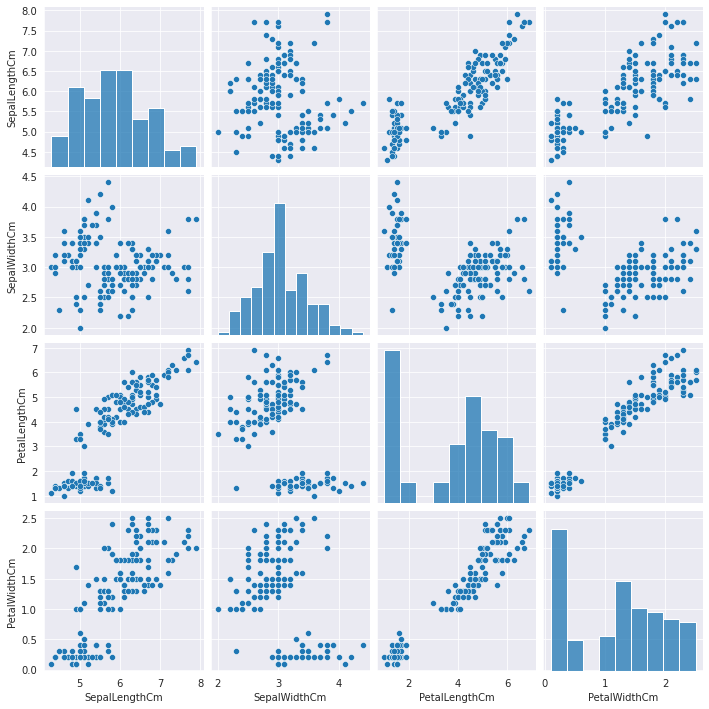

In [11]:
# Plots with different features (without labels)

sns.pairplot(df);

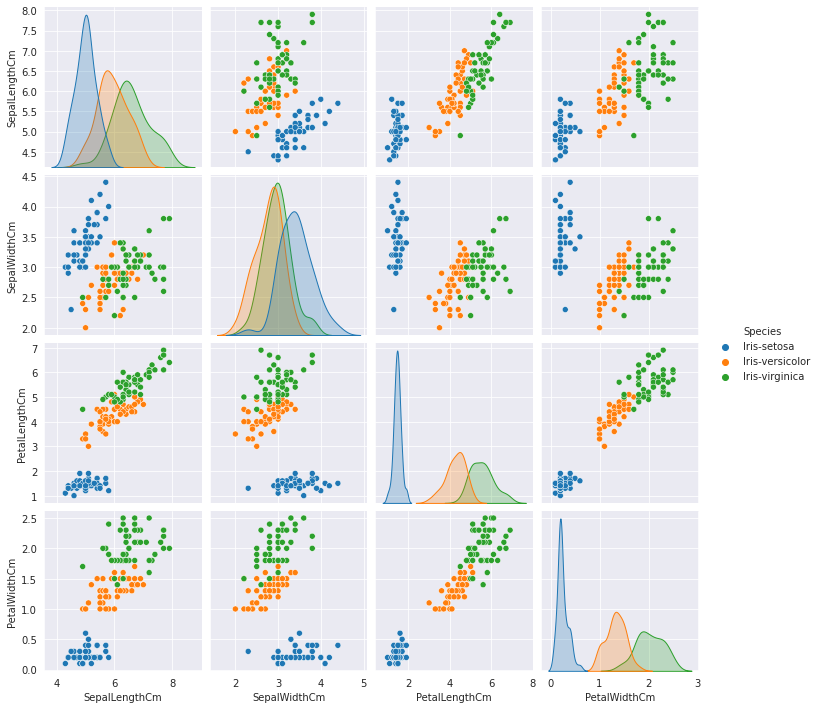

In [12]:
# Plots with different features (with labels)

sns.pairplot(df,hue='Species');

We can observe the cluster formation using the given target outputs. In subsequent parts, we will be able to find optimum number of clusters without using the given target outputs.

# Separating the input (features) column

In [13]:

x = df.drop('Species',axis=1)    # x: input columns

# Finding optimal number of clusters

**Elbow Method**

Elbow method involves plotting the cost function (distortion) vs the number of clusters(k). The distortion goes down rapidly until the optimum value of k and then it decreases slowly.

In [14]:
from sklearn.cluster import KMeans

In [15]:
wss=[]          # wss : within-cluster sum of squares
cluster_range = range(1,10)

for k in cluster_range:
  km = KMeans(n_clusters=k)    # Creating a KMeans clustering model with k clusters.
  km.fit(x)
  inertia = km.inertia_
  wss.append(inertia)

print(wss)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.56163015873016, 38.930963049671746, 34.25437337421033, 30.03119305211697, 28.162381285381294]


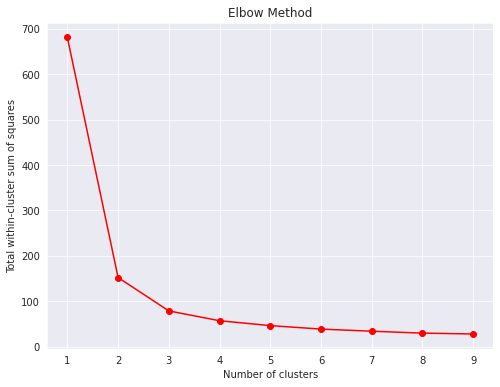

In [16]:
# Finding optimum number of clusters by visualizing elbow method

plt.figure(figsize=(8,6))
plt.plot(cluster_range,wss,'ro-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Total within-cluster sum of squares');

We can observe from the above plot that the optimum number of clusters is **3** since **wss** decreases slowly after the specified cluster number.

# Marking cluster-centroids

K-Means is an iterative algorithm which involves two steps:
1. Cluster assignment step
2. Centroid move step

We continue the above steps until the algorithm converges.

We can visualize the final cluster-centroids in the following way.

In [17]:
# Training K-Means model with 3 clusters

model = KMeans(n_clusters = 3)   
model.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
# Finding cluster_centroids

cc = model.cluster_centers_       # Gives coordinates of centroid of each cluster 

cc = pd.DataFrame(cc,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
cc

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.418000,1.464000,0.244000
2,5.901613,2.748387,4.393548,1.433871


In [19]:
# Predicted Labels
labels = model.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [20]:
predict_df = x
predict_df['Predicted_Labels'] = labels
predict_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted_Labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


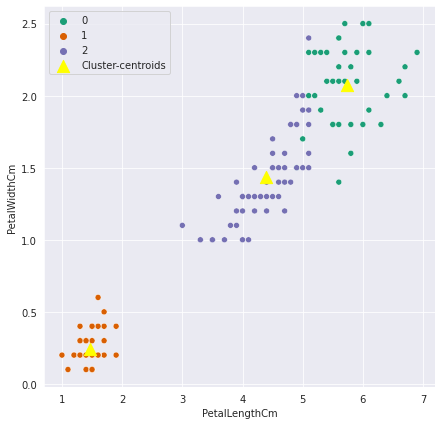

In [21]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Predicted_Labels',data=predict_df,palette='Dark2')
plt.scatter(cc['PetalLengthCm'],cc['PetalWidthCm'],marker='^',s=150,c='yellow',label='Cluster-centroids')
plt.legend();

# 3-D visualization

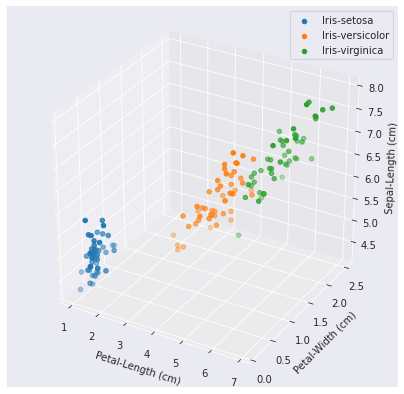

In [22]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')

for species,iris in df.groupby('Species'):
  ax.scatter(iris['PetalLengthCm'],iris['PetalWidthCm'],iris['SepalLengthCm'],label=species)

plt.legend()

ax.set_xlabel('Petal-Length (cm)')
ax.set_ylabel('Petal-Width (cm) ')
ax.set_zlabel('Sepal-Length (cm)')

plt.show()